### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

### 2. Load and Display the first few rows of the dataset

In [2]:
churn = pd.read_csv("C:\\Users\\HP\\Downloads\\Customer-Churn-Records.csv")
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


### 3. Data Overview
#### The columns info

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

#### Statistics

In [4]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


#### Check for missing values

In [5]:
churn.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

#### Check for duplicated 

In [6]:
churn.duplicated().sum()

0

#### Drop unnecessary columns

In [7]:
churn.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

#### Recode the categorical columns 

In [8]:
churn['Exited']=churn['Exited'].map({0:'No',1:'Yes'})
churn['HasCrCard']=churn['HasCrCard'].map({1:'Yes',0:'No'})
churn['Complain']=churn['Complain'].map({1:'Yes',0:'No'})
churn['IsActiveMember']=churn['IsActiveMember'].map({1:'Yes',0:'No'})


#### change the type of 'Satisfaction Score' column

In [9]:
churn['Satisfaction Score']=churn['Satisfaction Score'].astype(dtype='object')
churn['NumOfProducts']=churn['NumOfProducts'].astype(dtype='object')

#### Summarize numerical and categorical features

In [10]:
numerical_cols = churn.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = churn.select_dtypes(include=['object']).columns
print(f"Numerical columns: {list(numerical_cols)}")
print(f"Categorical columns: {list(categorical_cols)}")

Numerical columns: ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Point Earned']
Categorical columns: ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited', 'Complain', 'Satisfaction Score', 'Card Type']


#### drop the target column from the predictors list

In [11]:
categorical_cols=categorical_cols.drop('Exited')

### 4. EDA
#### Visualize the distribution of numerical variables

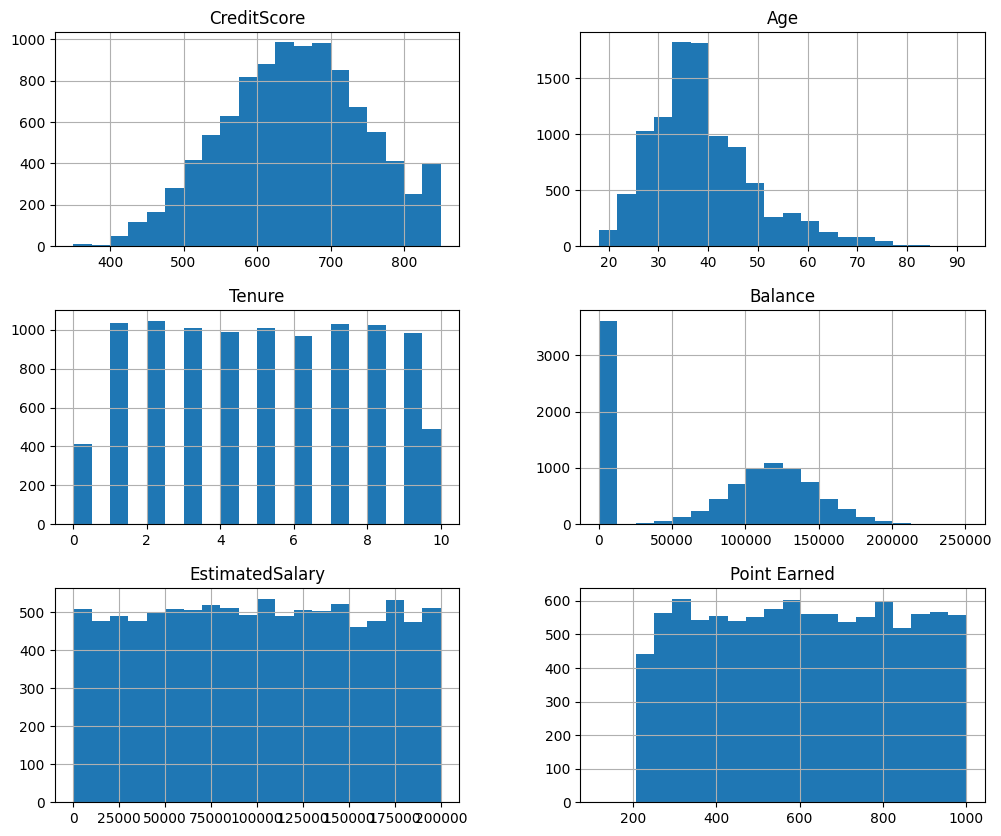

In [ ]:
churn[numerical_cols].hist(bins=20, figsize=(12, 10))
plt.show()

#### Analyze the target variable (assuming 'Exited' is the target)

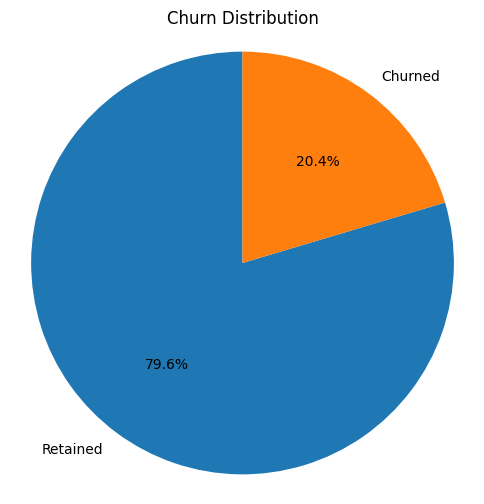

In [13]:
plt.figure(figsize=(6, 6))
churn_counts = churn['Exited'].value_counts()
plt.pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()

#### Visualize the distribution of categorical variables

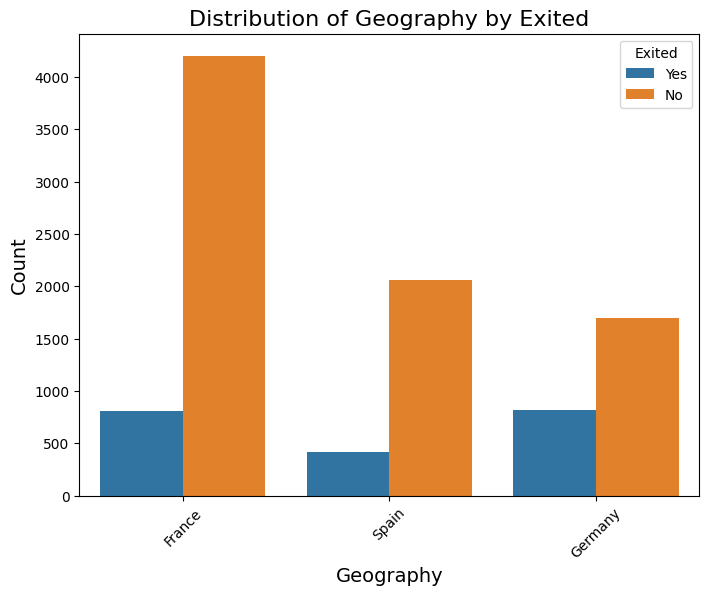

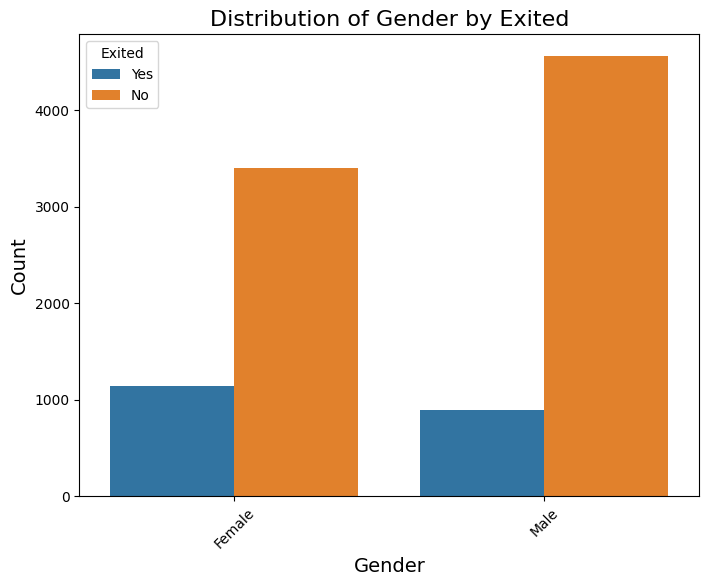

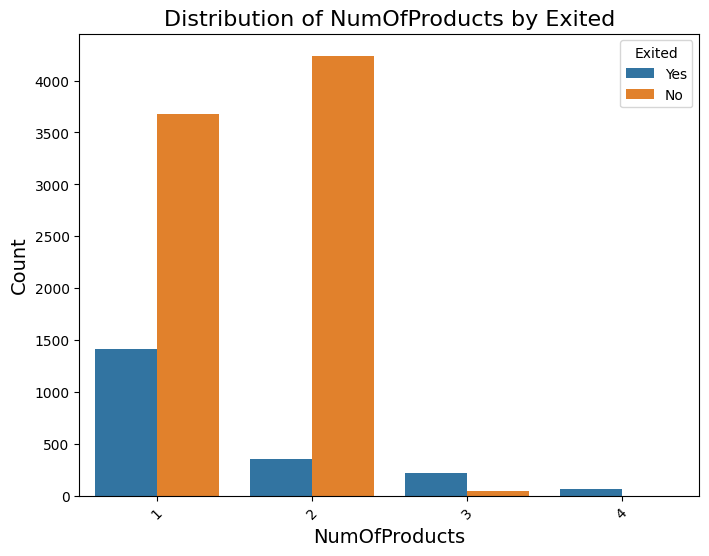

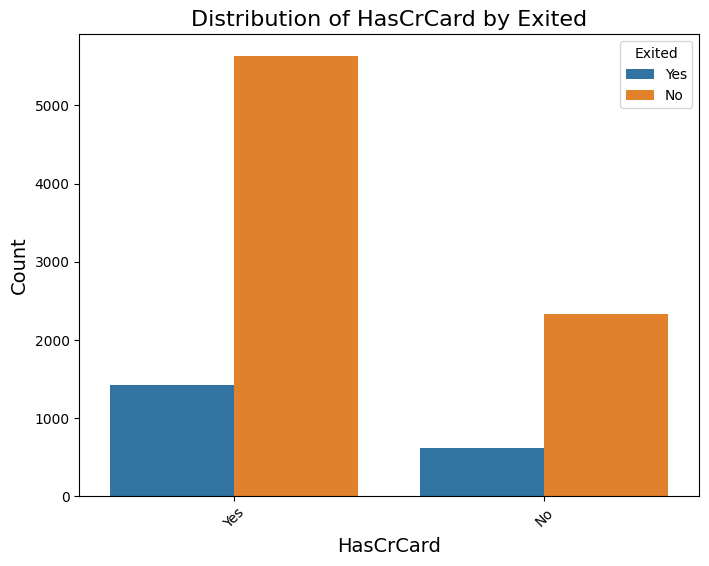

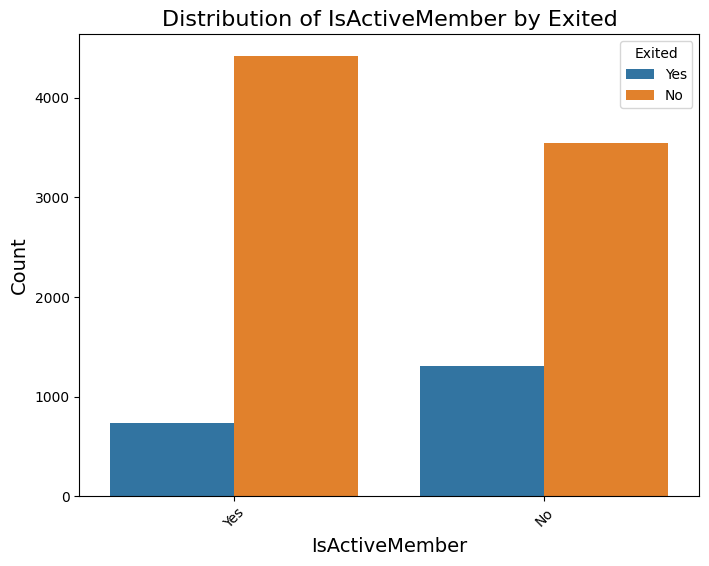

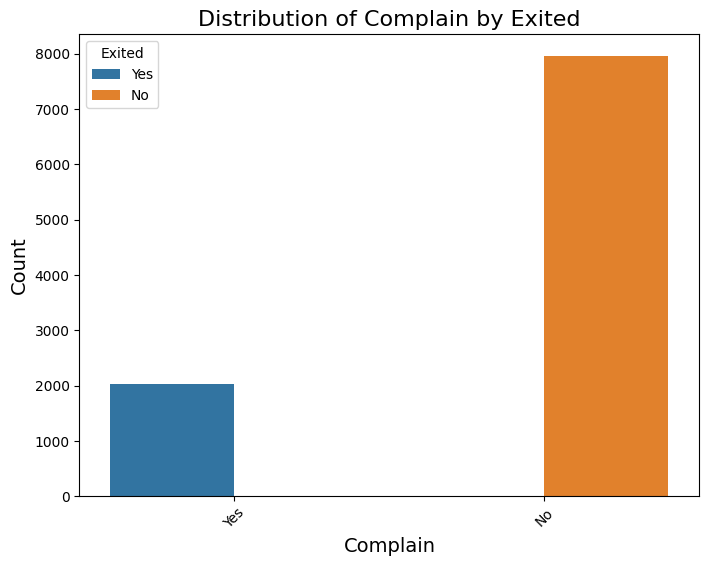

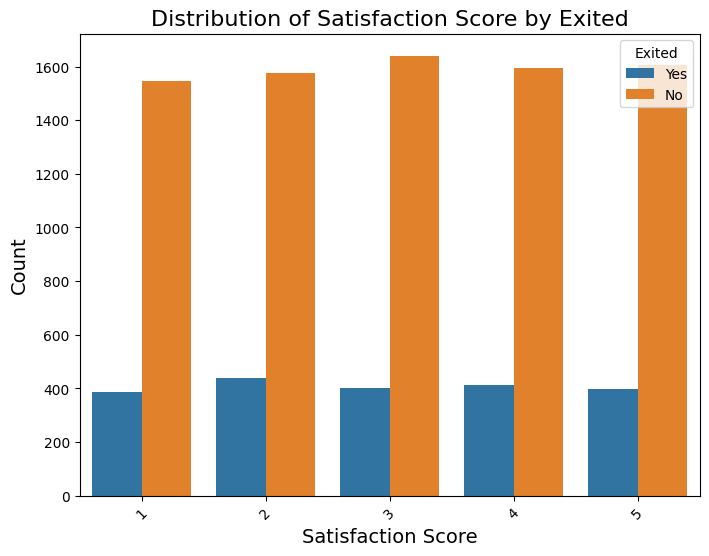

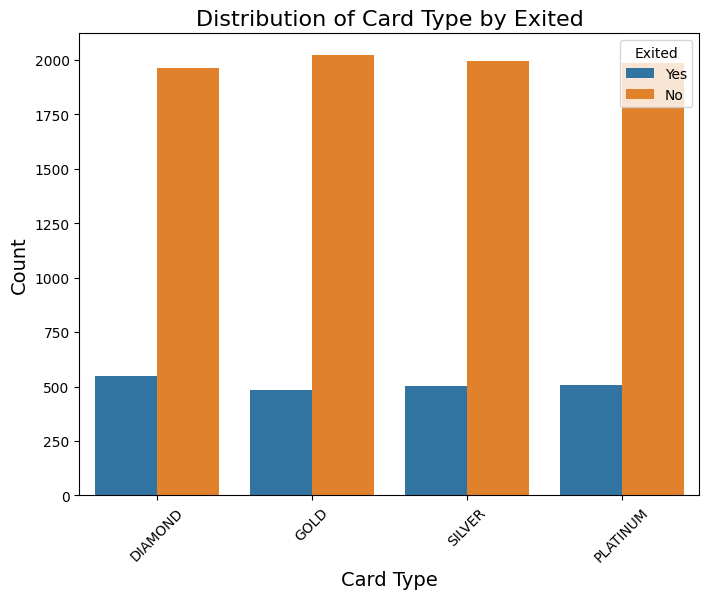

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='Exited', data=churn)
    plt.title(f'Distribution of {col} by Exited', fontsize=16) 
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.show()

#### Age Distribution of Churned and Retained Customers

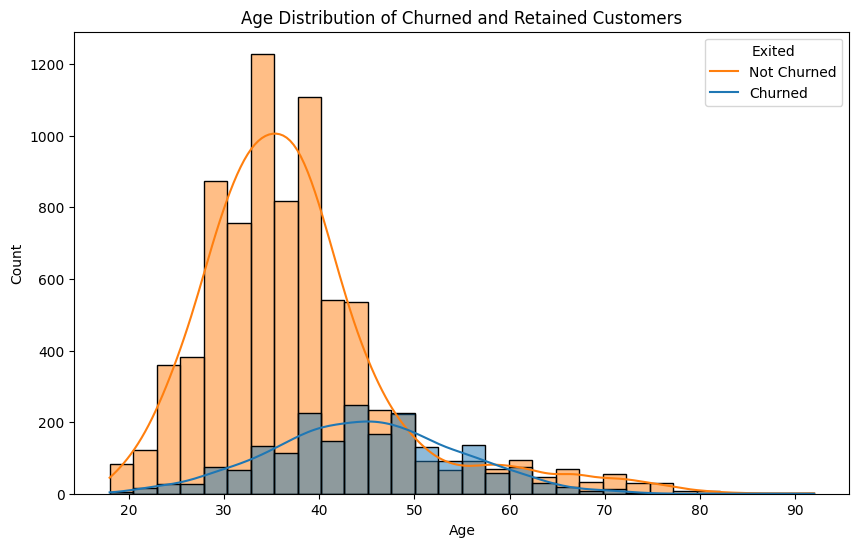

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(churn, x='Age', hue='Exited', bins=30, kde=True)
plt.title('Age Distribution of Churned and Retained Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

#### Balance Distribution by Churn Status

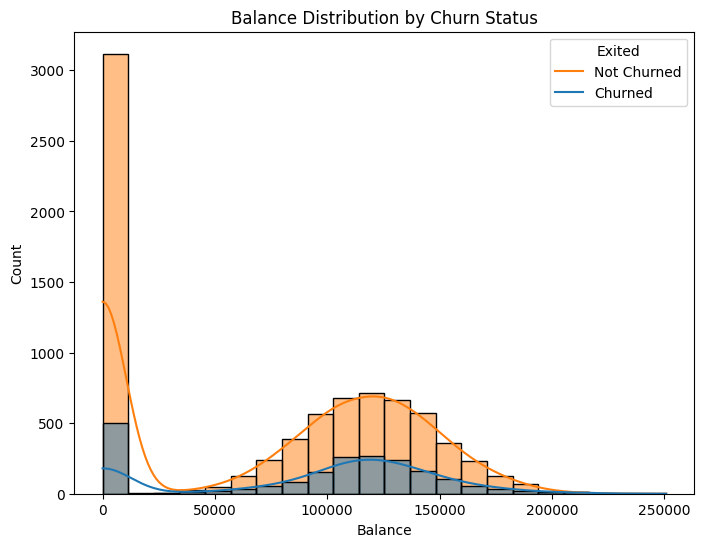

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(churn, x='Balance', hue='Exited', kde=True)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

#### Credit Score Distribution by Churn Status

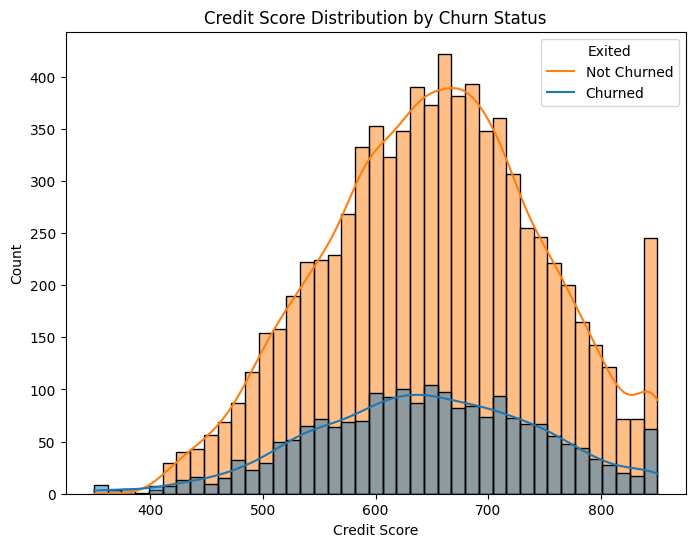

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(churn, x='CreditScore', hue='Exited', kde=True)
plt.title('Credit Score Distribution by Churn Status')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Exited', loc='upper right', labels=['Not Churned', 'Churned'])
plt.show()

### Correlation matrix for numerical variables

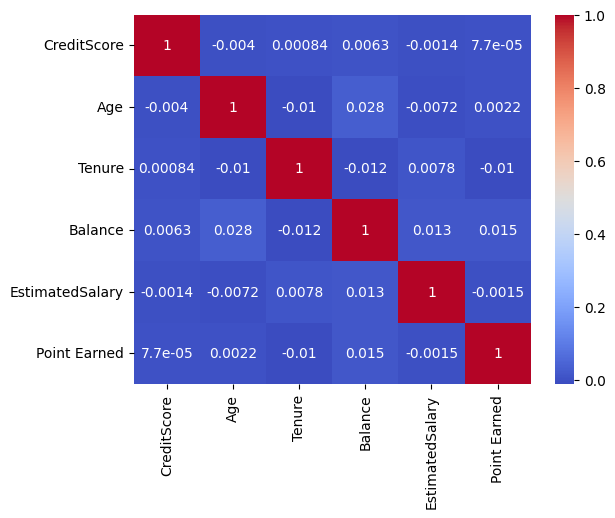

In [52]:
corr_matrix = churn[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

### 5. Data Preprocessing

#### Separate features and target

In [14]:
X = churn.drop(columns='Exited')
y = churn['Exited']

#### Split the dataset into training and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Define preprocessing for numerical and categorical features

In [16]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#### Combine preprocessing for both numeric and categorical features

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

### 6. Model Pipelines
For each model, we'll build a pipeline that includes preprocessing and training.

In [ ]:
# Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))])

# Decision Tree
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())])

# Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())])

# XGBoost
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))])


### 7. Hyperparameter Tuning
#### Hyperparameter tuning for Logistic Regression

In [20]:

logreg_param_grid = {
    'classifier__C': [ 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'lbfgs']
}

logreg_grid = GridSearchCV(logreg_pipeline, logreg_param_grid, cv=5, scoring='accuracy')
logreg_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary',
       'Point Earned'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Complain', 'Satisfaction Score', 'Card Type'],
      dtype='object'))])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

#### Hyperparameter Tuning for Decision Tree

In [21]:
dt_param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],           # Try with and without max depth limit     
    'classifier__min_samples_split': [2, 10, 20],           # Minimum samples to split an internal node   
    'classifier__min_samples_leaf': [1, 5, 10],              # Minimum samples required in leaf node
    'classifier__criterion': ['gini', 'entropy']               # Splitting criteria
}


dt_grid = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='accuracy')

dt_grid.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary',
       'Point Earned'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Complain', 'Satisfaction Score', 'Card Type'],
      dtype='object'))])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 5, 10],
                         'classifier__min_samples_split': [2, 10, 20]},
             scoring='accuracy')

#### Hyperparameter tuning for Random Forest

In [22]:
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, None]
}

rf_grid = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary',
       'Point Earned'],
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Complain', 'Satisfaction Score', 'Card Type'],
      dtype='object'))])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [10, 20, None],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='accuracy')

#### Hyperparameter Tuning for XGBoost

In [28]:

X_train[categorical_cols] = X_train[categorical_cols].astype('category')
X_test[categorical_cols] = X_test[categorical_cols].astype('category')

# Initialize XGBClassifier with enable_categorical set to True
xgb_grid = xgb.XGBClassifier(enable_categorical=True)

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Fit the model using the encoded target variable
xgb_grid.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### 8. Model Evaluation
#### 1. Logistique regression

In [24]:
# Best model from grid search
best_model = logreg_grid.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Model evaluation
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))
print("ROC AUC Score: ", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))

Accuracy:  0.999
Confusion Matrix: 
 [[1606    1]
 [   1  392]]
Classification Report: 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      1607
         Yes       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC AUC Score:  0.9996025657468677


#### 2. Decision tree

In [25]:
# Best model from grid search for Decision Tree
best_dt = dt_grid.best_estimator_

# Make predictions for Decision Tree
y_pred_dt = best_dt.predict(X_test)

# Model evaluation for Decision Tree
print("Decision Tree Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print(f"ROC-AUC Score: {roc_auc_score(y_test, best_dt.predict_proba(X_test)[:, 1]):.4f}")


Decision Tree Evaluation:
Accuracy: 0.9990
Confusion Matrix:
 [[1606    1]
 [   1  392]]
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      1607
         Yes       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC-AUC Score: 0.9987


#### 3. Random forest

In [26]:
# Best model from grid search for Random Forest
best_rf = rf_grid.best_estimator_

# Make predictions for Random Forest
y_pred_rf = best_rf.predict(X_test)

# Model evaluation for Random Forest
print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]):.4f}")


Random Forest Evaluation:
Accuracy: 0.9990
Confusion Matrix:
 [[1606    1]
 [   1  392]]
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      1607
         Yes       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC-AUC Score: 0.9995


#### 4. xgboost

In [32]:
# Make predictions on the test set
y_pred = xgb_grid.predict(X_test)

# Model evaluation for XGBoost
print("XGBoost Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test_encoded, xgb_grid.predict_proba(X_test)[:, 1]):.4f}")


XGBoost Evaluation:
Accuracy: 0.9990
Confusion Matrix:
 [[1606    1]
 [   1  392]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC-AUC Score: 0.9977


### The best model:
hen dealing with imbalanced data, accuracy alone is generally not a reliable metric because it can be misleading. 

In the context of imbalanced datasets, other metrics like Precision, Recall, F1-Score, and particularly ROC-AUC Score provide a more nuanced view of model performance.

As we can see from the results, the Confusion Matrix and Classification Report provide similar outcomes across all models. Therefore, we will use the ROC-AUC Score to choose the best model.

The best model is Logistic Regression with ROC-AUC score: 0.9996


### Make the final model to make predection

In [38]:
# Best model from grid search
best_model = logreg_grid.best_estimator_
final_model= best_model.fit(X,y)